# 📊 W05 Lab (SOLUTIONS)

**DS105A W05 LAB – Data for Data Science (Autumn Term 2025/2026)**

**Solutions written by:** [Jon Cardoso-Silva](https://github.com/jonjoncardoso)

<div style="font-family: system-ui; padding: 20px 30px 20px 20px; background-color: #FFFFFF; border-left: 8px solid #ED9255; border-radius: 8px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.1);max-width:600px;color:#212121;">

**Lab Practice Notebook - SOLUTIONS**

- 📅 Date: 31 October 2025
- 👤 Name: [Your name] (🧑‍✈️ Pilot/Copilot)
- 👤 Name: [Your partner's name] (🙋 Copilot/Pilot)
- 🎯 Purpose: Master seaborn visualisation and documentation navigation skills

<span style="display:block;line-height:1.15em;color:#666666;font-size:0.9em;">

🥅 **Learning Goals**

 i) Filter data and create bar plots with seaborn,
 ii) Export plots in multiple formats (PNG vs SVG),
 iii) Navigate technical documentation to learn FacetGrid,
 iv) Create markdown reports with embedded figures.

</span>

</div>


## 📋 Before You Start

Make sure you have:

- ✅ Completed the 📝 **W04 Practice** (or most of it!)
- ✅ Attended yesterday's 🖥️ **W05 Lecture** on advanced pandas and visualisation
- ✅ Found a partner for pair programming today

**Pair Programming Roles:**

- 🧑‍✈️ **Pilot**: The person typing the code
- 🙋 **Copilot**: The person guiding and checking the code

You'll swap roles between Task 01 and Task 03!


## ⚙️ Library Imports


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries loaded successfully!")

# We will use this later to display images reliably in the notebook
from IPython.display import Image


✅ Libraries loaded successfully!


In [2]:
# We will need a `figures` directory to save our plots
os.makedirs('figures', exist_ok=True)
 

# Task 01: Filtering & Bar Plots

In this task, you'll filter the London/Paris weather data, create a bar plot using seaborn, and practice writing narrative titles.


## Step 1: Load and Inspect the Data


In [3]:
# Load the CSV file
df = pd.read_csv('data/london_paris_weather.csv')

# Inspect the data structure
print("DataFrame shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

DataFrame shape: (14610, 4)

Column names: ['city', 'time', 'temperature_2m_max', 'rain_sum']

Data types:
city                   object
time                   object
temperature_2m_max    float64
rain_sum              float64
dtype: object


In [4]:
print("\nFirst few rows:")
df.head()


First few rows:


city        time  temperature_2m_max  rain_sum
0  London  2005-01-01                11.1       0.5
1  London  2005-01-02                 6.8       0.0
2  London  2005-01-03                 9.5       0.0
3  London  2005-01-04                10.6       0.1
4  London  2005-01-05                 8.3       1.1

**What we see:**
- The dataset contains weather data for London and Paris
- Columns: `city`, `time` (date strings), `temperature_2m_max`, `rain_sum`
- Multiple years of daily data for both cities


## Step 2: Quick Question - Which City Had More Rainfall?

Let's use `groupby()` to find the total rainfall for each city. This is a simple example that demonstrates the basic `groupby()` pattern.


In [5]:
# Group by city and sum the rainfall
total_rainfall = df.groupby('city')['rain_sum'].sum()

print("Total rainfall by city:")
total_rainfall


Total rainfall by city:


city
London    13367.4
Paris     13864.9
Name: rain_sum, dtype: float64

**NOTE:** The output of this `groupby()` operation is a pandas Series, not a DataFrame. This is because after we aggregated the data, we applied a default function (`.sum()`) to a single column of each group - individual columns are a Pandas Series. One advantage of this is that the groupings become the index of the Series, which you can see in the output above.



In [6]:
# An index is like a label that uniquely identifies each row in a Series
total_rainfall.index

Index(['London', 'Paris'], dtype='object', name='city')

**💡 TIP:** pandas Series have a [`idxmax()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html) method that returns the index of the maximum value which you could use to answer this question directly from code:

In [7]:
print("\nAnswer:", total_rainfall.idxmax(), "had more total rainfall")


Answer: Paris had more total rainfall


### Understanding `groupby()`: The Split-Apply-Combine Pattern

**What just happened?** Let's break down `df.groupby('city')['rain_sum'].sum()`:

1. **Split**: The data is divided into groups based on the `city` column
   - One group contains all London rows
   - One group contains all Paris rows

2. **Apply**: The `sum()` function is applied to the `rain_sum` column within each group
   - Sum all rainfall values for London
   - Sum all rainfall values for Paris

3. **Combine**: The results are combined into a single Series with city names as the index

**Why this works:**

- `groupby('city')` creates the groups

- `['rain_sum']` selects the column we want to aggregate

- `.sum()` is the aggregation function we apply

This is the **simplest** use of `groupby()` - grouping by a single categorical column and applying a simple aggregation function.


## Step 3: Create plot_df for London Monthly Rainfall

Now we'll tackle a more complex task: grouping by month. This requires temporal grouping, which has some additional challenges we need to address.


In [8]:
# Step 1: Convert the 'time' column to datetime
# This is CRITICAL - we can't use .dt accessor on strings!
df['time'] = pd.to_datetime(df['time'])

# Step 2: Extract the month from the datetime
df['month'] = df['time'].dt.month

# Step 3: Filter for London only
london_df = df[df['city'] == 'London']

# Step 4: Group by month and sum rainfall
monthly_rainfall = london_df.groupby('month')['rain_sum'].sum()

# Step 5: Reset index to create a clean DataFrame for plotting
plot_df = monthly_rainfall.reset_index()

print("Monthly rainfall for London:")
plot_df


Monthly rainfall for London:


month  rain_sum
0       1    1073.0
1       2     950.0
2       3     941.1
3       4     831.2
4       5    1169.3
5       6    1195.9
6       7    1244.9
7       8    1214.6
8       9     989.0
9      10    1338.0
10     11    1285.8
11     12    1134.6

**Why `.reset_index()`?**

As you saw before, the output of `groupby()` is a pandas Series, not a DataFrame. The month (the grouping variable) becomes the index of that Series and if you want to treat it all as a table, then you can pop it out of the index and convert it into a column.

### Understanding Temporal Grouping Challenges

**Why each step matters:**

1. **`pd.to_datetime()`**: Converts string dates (like "2005-01-01") to datetime objects. Without this, Python sees dates as text and can't extract month information.

2. **`.dt.month`**: The `.dt` accessor only works on datetime columns. It gives us access to date components like year, month, day, etc. Think of `.dt` like `.str` for strings - it's a special set of datetime operations.

3. **Filter before grouping**: We filter for London first, then group by month. This ensures we're only looking at London's data.

4. **`reset_index()`**: After `groupby()`, pandas creates a special index structure. `reset_index()` converts this back to a regular DataFrame with columns, which seaborn requires. 

**Common mistakes:**
- ❌ Trying to use `.dt.month` on a string column → Error!
- ❌ Forgetting to filter → Groups both cities together!
- ❌ Skipping `reset_index()` → Seaborn can't read the data structure!


**Alternative way to write the code:**

If you are into [pandas method chaining](https://www.geeksforgeeks.org/python/how-to-filter-rows-using-pandas-chaining/) (we like it!) you can achieve the same result in one go, you would need to learn of a new pandas method called `.query()` which is a way of filtering rows based on a condition.

The final code would look like this:

In [9]:
# Chain all steps together, starting from df and ending with a clean plotting DataFrame.
plot_df = (
    df
    .assign(time=pd.to_datetime(df['time']))            # Convert 'time' to datetime (safe assign)
    .assign(month=lambda d: d['time'].dt.month)         # Extract month
    .query("city == 'London'")                          # Filter for London only
    .groupby('month', as_index=False)['rain_sum'].sum() # Group by month, sum rainfall, keep as DataFrame
)

print("Monthly rainfall for London:")
plot_df


Monthly rainfall for London:


month  rain_sum
0       1    1073.0
1       2     950.0
2       3     941.1
3       4     831.2
4       5    1169.3
5       6    1195.9
6       7    1244.9
7       8    1214.6
8       9     989.0
9      10    1338.0
10     11    1285.8
11     12    1134.6

In the above, the `as_index=False` argument tells pandas to keep the month as a column in the resulting DataFrame, rather than using it as the index. This way we avoid using `reset_index()` later.

## Step 4: Create the Bar Plot

Now that we have `plot_df` ready, we can create our visualisation. Remember the **plot_df pattern** from 🖥️ **W05 Lecture**: prepare your data first, then visualise.


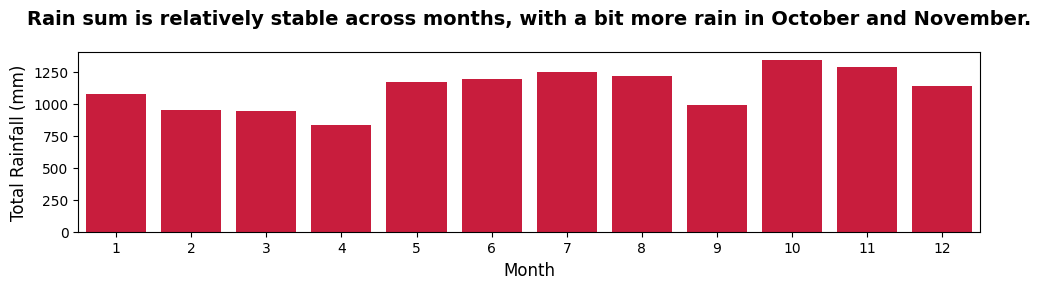

In [10]:
# Set up the figure size
# Tweak it according to your screen size
plt.figure(figsize=(10, 3))

# Create the bar plot using seaborn
sns.barplot(x='month', y='rain_sum', data=plot_df, color='#e4002b')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.title("Rain sum is relatively stable across months, with a bit more rain in October and November.", 
          fontsize=14, fontweight='bold', pad=20)


# Adjust layout to prevent label clipping
plt.tight_layout()

# Display the plot
plt.show()


### Narrative Titles: Good vs Bad

**Bad title:** "Monthly Rainfall for London"
- ❌ Just describes what's in the chart
- ❌ Doesn't communicate any finding or insight
- ❌ Reader has to interpret the data themselves

**Good title:** "Rain sum is relatively stable across months, with a bit more rain in October and November."
- ✅ States a specific finding from the data
- ✅ Communicates an insight immediately
- ✅ Answers "so what?" - tells the reader why this matters

**The key difference:** Narrative titles tell a story about your findings, not just describe the data. They should make a claim or reveal an insight that the visualisation supports.

**Reflection:** What makes a title narrative vs descriptive? Think about what insight your plot reveals, not just what it shows.


# Task 02: Export Your Plot

Now you'll learn how to save your plots in multiple formats and understand when to use each format.


## Export as PNG

You will need to recreate the plot first, because the `plt.show()` 'consumes' the plot and you can't save it again.

In [11]:
plt.figure(figsize=(10, 3))

# Create the bar plot using seaborn
sns.barplot(x='month', y='rain_sum', data=plot_df, color='#e4002b')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.title("Rain sum is relatively stable across months, with a bit more rain in October and November.", 
          fontsize=14, fontweight='bold', pad=20)


# Adjust layout to prevent label clipping
plt.tight_layout()

plt.savefig('figures/fig01-london-rainfall-per-month.png', 
            dpi=300, 
            bbox_inches='tight')
plt.close()  # Close the figure to free memory

print("✅ PNG saved successfully!")


✅ PNG saved successfully!


### Why `bbox_inches='tight'` Matters

Without `bbox_inches='tight'`, matplotlib might clip your axis labels or titles. This parameter automatically adjusts the bounding box to include all plot elements. Always use it unless you have a specific reason not to!


## Export as SVG


In [12]:
# Recreate the plot (you need the plot active to save it)
plt.figure(figsize=(10, 3))
sns.barplot(x='month', y='rain_sum', data=plot_df, color='#e4002b')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.title("Rain sum is relatively stable across months, with a bit more rain in October and November.", 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()

# Save as SVG
plt.savefig('figures/fig01-london-rainfall-per-month.svg', 
            bbox_inches='tight')
plt.close()

print("✅ SVG saved successfully!")


✅ SVG saved successfully!


### PNG vs SVG: Which Should You Use?

**PNG (Raster Format)**
- ✅ Good for: Presentations, websites, social media
- ✅ Advantages: Small file size, widely supported, good for photos
- ❌ Disadvantages: Pixelated when zoomed in, not scalable
- **Use when**: You need a quick export for sharing or embedding

**SVG (Vector Format)**
- ✅ Good for: Publications, reports, professional documents
- ✅ Advantages: Infinitely scalable without quality loss, smaller file size for simple plots
- ❌ Disadvantages: Not good for complex images/photos, some older software can't open
- **Use when**: You need publication-quality figures or want to edit the plot later (SVG can be edited in design software)

**For this course**: Either format works, but SVG is preferred for Mini-Project 1 submissions as it's more professional.


## Display the images


It should work simply with a simple Markdown image tag: `![](./figures/fig01-london-rainfall-per-month.png)`:


![](./figures/fig01-london-rainfall-per-month.png)

Sometimes the above doesn't work on GitHub (even though it works in Jupyter Notebook), so you can use the `IPython.display.Image` object:

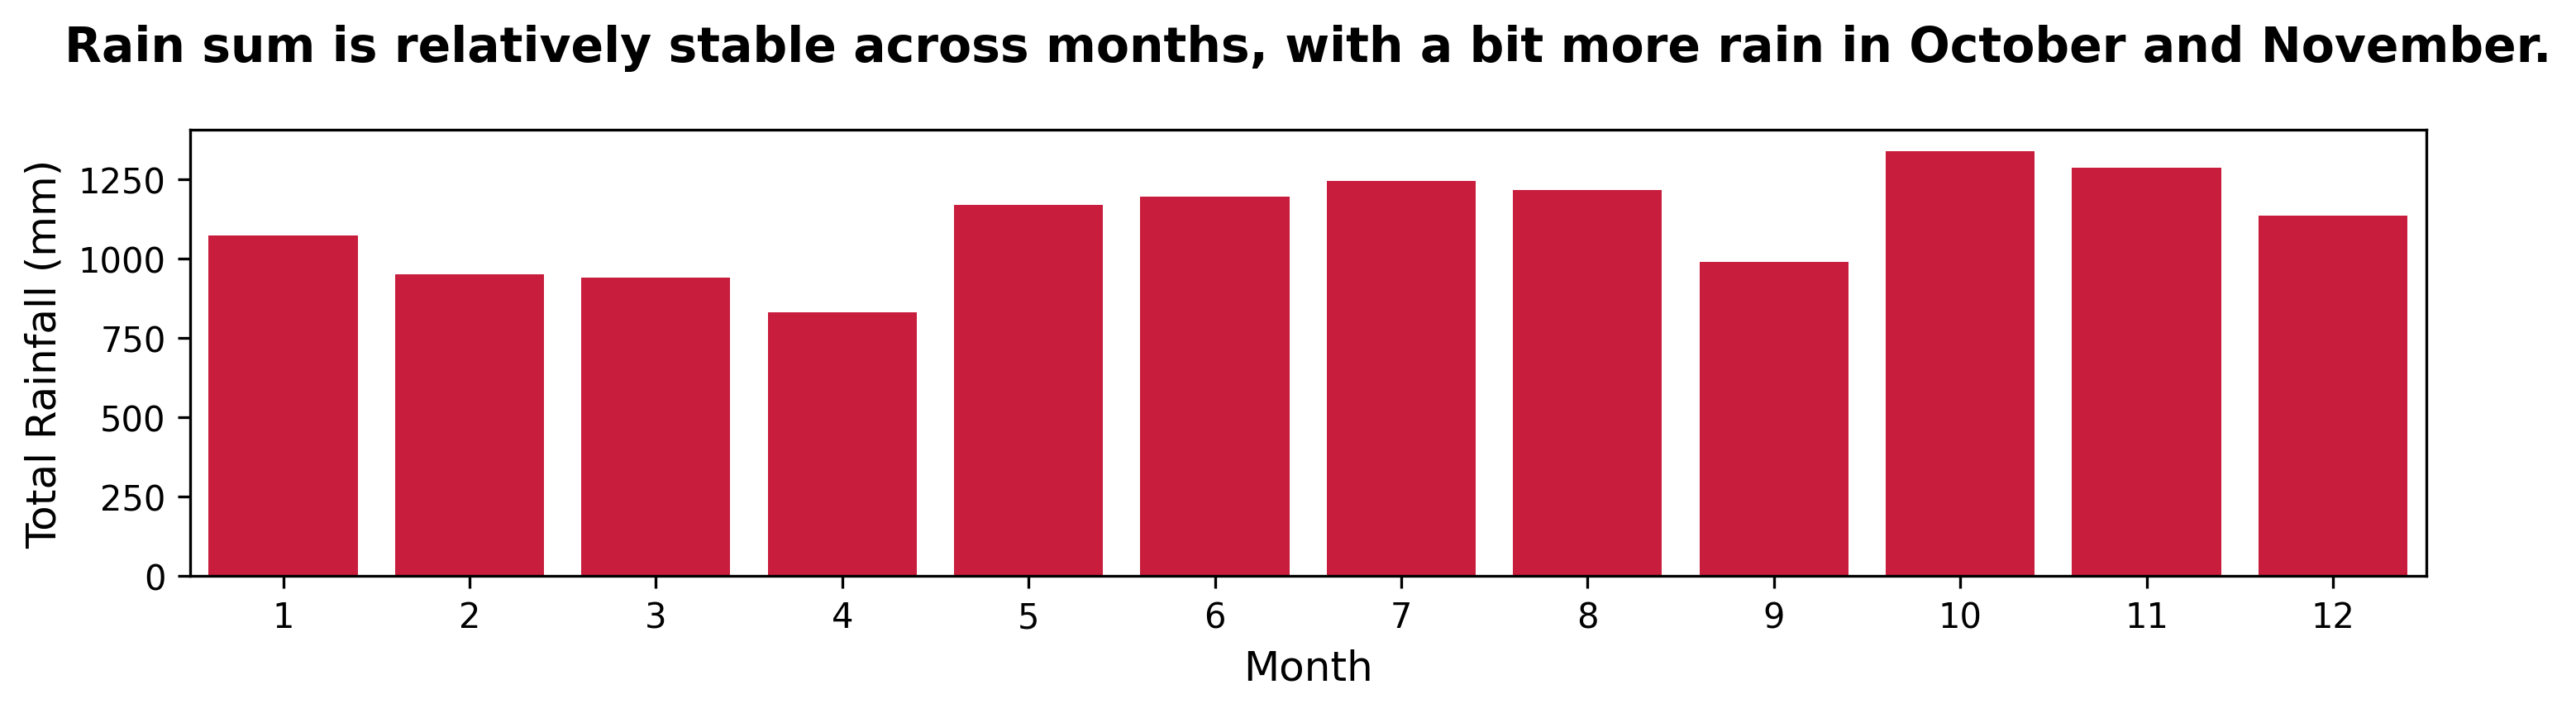

In [13]:
Image(filename='./figures/fig01-london-rainfall-per-month.png')

### Documentation Reflection

**How did you discover how to save plots?**

Example documentation:

```markdown
"I found the `savefig()` method on the [matplotlib.pyplot documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html). 

I verified it worked by:

1. Testing the export and opening the file
2. Checking that all labels were visible (not clipped)
3. Comparing file sizes between PNG and SVG formats
4. Reading the documentation for the `dpi` and `bbox_inches` parameters to understand their purpose."

```

**Key takeaway:** Documenting your discovery process is a professional skill. In Mini-Project 1, you'll need to show how you learned new functions and verified they work correctly.


# Task 03: Learn about FacetGrid

This task focuses on **technical documentation navigation** - a core data science skill. You'll read complex documentation, understand it, and implement it yourself.


## Step 1: Understanding FacetGrid from Documentation

**The Process:** Read first, discuss, then code. Don't rush to implementation!

**Key concepts from the [FacetGrid documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html):**

1. **`FacetGrid(data, col=, row=, hue=)`**: Creates a grid of subplots (facets) based on categorical variables
   - `col='city'` creates one column (subplot) for each city
   - `row=` can create rows for another variable
   - `hue=` adds color encoding (we'll use this later)

2. **`.map(func, x, y)`**: Applies a plotting function to each facet
   - `func` is the plotting function (like `sns.barplot`, NOT `sns.barplot()` - notice no parentheses!)
   - `x` and `y` are column names to pass as arguments

3. **What is a "facet"?**: A facet is one subplot in the grid. If you have 2 cities, FacetGrid creates 2 facets (one for each city).

**Why read documentation first?**
- Even if AI helps you with syntax, you must verify against official docs
- Understanding the mental model helps you use the tool correctly
- Documentation navigation is tested in Mini-Project 1 - practice now!


## Step 2: Conceptual Understanding Before Coding

**Common misconception:** "I'll just create two separate plots for London and Paris"

**Why FacetGrid is better:**
- ✅ Consistent axes scale across facets (easier comparison)
- ✅ Automatic layout and spacing
- ✅ One line of code instead of looping or repeating
- ✅ Clean, professional appearance

**Mental model:** Think of FacetGrid as a template that says "create one plot per category, all using the same structure"


## Step 3: Create plot_df for Both Cities

Now we need to prepare data that includes both London and Paris, grouped by city and month. This requires **multi-level grouping**.


In [14]:
# We already converted 'time' to datetime and created 'month' column earlier
# If starting fresh, do: df['time'] = pd.to_datetime(df['time'])
#                        df['month'] = df['time'].dt.month


# Group by BOTH city AND month, then sum rainfall
# This creates a MultiIndex structure
comparison_grouped = df.groupby(['city', 'month'])['rain_sum'].sum()

print("Before reset_index() - this is a MultiIndex Series:")
print(comparison_grouped.head(10))
print("\nIndex type:", type(comparison_grouped.index))


Before reset_index() - this is a MultiIndex Series:
city    month
London  1        1073.0
        2         950.0
        3         941.1
        4         831.2
        5        1169.3
        6        1195.9
        7        1244.9
        8        1214.6
        9         989.0
        10       1338.0
Name: rain_sum, dtype: float64

Index type: <class 'pandas.core.indexes.multi.MultiIndex'>


If I wanted, I could 'search' for a specific value using this MultiIndex:

In [15]:
comparison_grouped.loc[('London', 10),] # Identify the index location with ()

1338.0

### Understanding Multi-Level Groupby

**What `groupby(['city', 'month'])` does:**
- **Split**: Creates groups for every combination of (city, month)
  - Group 1: London, January
  - Group 2: London, February
  - Group 3: Paris, January
  - Group 4: Paris, February
  - ... and so on for all combinations

- **Apply**: Sums `rain_sum` for each (city, month) combination

- **Combine**: Results in a Series with a **MultiIndex** (hierarchical index)
  - First level: city
  - Second level: month

**The problem:** Seaborn can't plot MultiIndex structures directly. We need regular columns!


In [16]:
# Reset index to convert MultiIndex to regular columns
plot_df_comparison = comparison_grouped.reset_index()

print("After reset_index() - now a clean DataFrame:")
plot_df_comparison.head(10)


After reset_index() - now a clean DataFrame:


city  month  rain_sum
0  London      1    1073.0
1  London      2     950.0
2  London      3     941.1
3  London      4     831.2
4  London      5    1169.3
5  London      6    1195.9
6  London      7    1244.9
7  London      8    1214.6
8  London      9     989.0
9  London     10    1338.0

**Notice the difference:**
- Before: MultiIndex with (city, month) as index levels
- After: Regular DataFrame with `city`, `month`, and `rain_sum` as columns

Now seaborn can read this structure! This is why `reset_index()` is crucial for plotting after `groupby()`.


### Documenting Your First Attempt

**Reflection template:**

> **What I tried first:**
> [Describe your initial approach based on documentation]
>
> **What worked:**
> [What parts of your code executed successfully?]
>
> **What didn't work:**
> [What errors did you get? What behavior was unexpected?]
>
> **Why it didn't work:**
> [Your understanding of why the mistake occurred]
>
> **How I fixed it:**
> [What changes you made, and what resources you consulted]

**Example reflection:**
> "I tried `g.map(sns.barplot(), 'month', 'rain_sum')` but got an error about arguments. I realized I was calling the function instead of passing it. After reading the docs more carefully, I saw that `.map()` expects the function object (no parentheses). I fixed it by removing the parentheses: `g.map(sns.barplot, 'month', 'rain_sum')`."


## Step 5: Corrected FacetGrid Implementation

Now let's see the correct implementation with explanations.


### Creating the `plot_df`

Let's use this as an opportunity to put together what we produced in Section 4 and produce a new `plot_df` suitable for this FacetGrid plot:

In [17]:
# Chain all steps together, starting from df and ending with a clean plotting DataFrame.
plot_df = (
    df
    .assign(time=pd.to_datetime(df['time']))            # Convert 'time' to datetime (safe assign)
    .assign(month=lambda d: d['time'].dt.month)         # Extract month
    .groupby(['city', 'month'], as_index=False)['rain_sum'].sum()
)

print("Monthly rainfall in both cities:")
plot_df


Monthly rainfall in both cities:


city  month  rain_sum
0   London      1    1073.0
1   London      2     950.0
2   London      3     941.1
3   London      4     831.2
4   London      5    1169.3
5   London      6    1195.9
6   London      7    1244.9
7   London      8    1214.6
8   London      9     989.0
9   London     10    1338.0
10  London     11    1285.8
11  London     12    1134.6
12   Paris      1     996.7
13   Paris      2     926.0
14   Paris      3    1107.0
15   Paris      4     922.6
16   Paris      5    1415.2
17   Paris      6    1358.7
18   Paris      7    1081.1
19   Paris      8    1272.3
20   Paris      9     956.0
21   Paris     10    1284.2
22   Paris     11    1205.5
23   Paris     12    1339.6

<Figure size 1000x500 with 0 Axes>

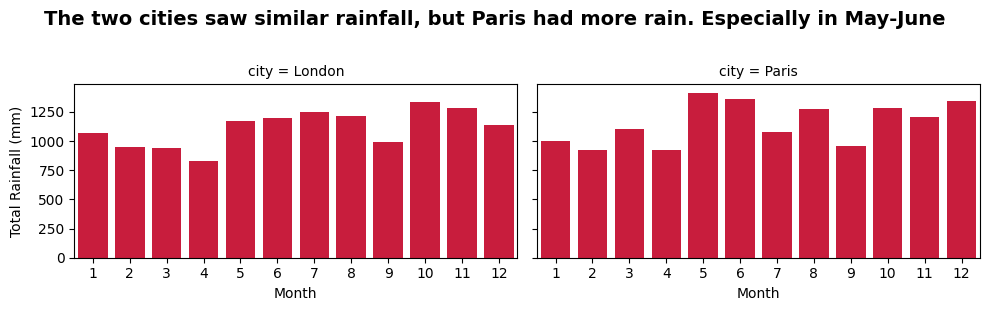

In [19]:
plt.figure(figsize=(10, 5))

# Create the FacetGrid
# col='city' tells FacetGrid to create one column (subplot) for each unique city value
g = sns.FacetGrid(plot_df, col='city', height=3, aspect=5/3, margin_titles=True, despine=False)

# Map the plotting function to each facet
# Notice: sns.barplot (no parentheses) - we're passing the function, not calling it
# 'month' becomes the x argument, 'rain_sum' becomes the y argument
g.map(sns.barplot, 'month', 'rain_sum', color='#e4002b', order=range(1, 13))

# Set axis labels
g.set_axis_labels('Month', 'Total Rainfall (mm)')

# Add a main title for the entire figure
g.figure.suptitle("The two cities saw similar rainfall, but Paris had more rain. Especially in May-June", 
                fontsize=14, fontweight='bold', y=1.02)

# Adjust layout
plt.tight_layout()

# If you save it before you show it, it works!
plt.savefig('figures/fig02-london-paris-comparison.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()


### Understanding FacetGrid's `.map()` Function

**How `.map()` works:**
1. FacetGrid splits your data by the `col` parameter (in our case, by city)
2. For each facet (each city), it calls the function you provide
3. It passes the column names you specify as arguments to that function

**Why `sns.barplot` not `sns.barplot()`?**
- `sns.barplot` is the **function object** - we're passing it to `.map()` so it can call it later
- `sns.barplot()` would **call the function immediately** and return a plot, which isn't what `.map()` expects

**Argument passing:**
- First argument after the function (`'month'`) → becomes `x` parameter
- Second argument (`'rain_sum'`) → becomes `y` parameter
- Additional keyword arguments (like `color='#e4002b'`) are passed through

This is a common pattern in Python called "passing functions as arguments" - very powerful!


## Step 6: Advantages of FacetGrid Reflection

**Why is FacetGrid better than creating two separate plots?**

**Example answers:**

1. **Consistent axes**: FacetGrid automatically uses the same scale for both facets, making visual comparison easier. With separate plots, you'd have to manually set `ylim()` to match.

2. **Cleaner code**: One FacetGrid call replaces a loop or duplicate plotting code. Less code = fewer places for bugs.

3. **Professional appearance**: FacetGrid handles spacing and alignment automatically. Your plots look more polished with minimal effort.

4. **Scalability**: Easy to extend - what if you wanted to compare 5 cities? With separate plots, that's 5 blocks of code. With FacetGrid, just add more cities to your data.

5. **Easy styling**: You can apply styling to all facets at once (like `g.set_axis_labels()`), rather than repeating it for each plot.

**Your thoughts:**
- [What other advantages do you see?]



# Task 04: Create a Report

Now you'll create a markdown report that tells a story with your visualisations, not just lists them.


## Markdown Report Structure

**Where to save:** `week05/REPORT.md` (or `my-ds105a-notes/week05/REPORT.md` if using your notes repo)

**Markdown syntax for images:**
```markdown
![Alt text describing the image](path/to/figure.png)
```

**Path rules:**
- If `REPORT.md` is in `week05/` and figures are in `week05/figures/`
- Use relative path: `figures/fig01-london-rainfall-per-month.png`

**Structure your report like a story:**
1. **Introduction/Context**: What data are you analyzing?
2. **Findings**: What does each plot show?
3. **Connection**: How do plots relate to each other?
4. **Conclusion**: What's the big picture insight?
